In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [3]:
# 데이터셋을 df에 저장
df = pd.read_csv('fdm_midterm.csv')

In [4]:
# df를 개괄적으로 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# df의 결측치와 데이터타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      503 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      500 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      503 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# df의 기초통계량 확인
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,506.000000,500.000000,506.000000,503.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555415,6.284634,68.574901,3.774835,9.549407,408.833002,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115838,0.702617,28.148861,2.106313,8.707259,168.862329,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.087875,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.142300,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.118000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


---

### 문제 1. 결측치 대체

In [7]:
# 각 컬럼의 결측치 개수 확인
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        3
RM         0
AGE        0
DIS        6
RAD        0
TAX        3
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- NOX, DIS, TAX 변수에서 결측치 확인

In [8]:
# 각 컬럼의 평균값으로 결측치 대체
df['NOX'] = df['NOX'].fillna(df['NOX'].mean())
df['DIS'] = df['DIS'].fillna(df['DIS'].mean())
df['TAX'] = df['TAX'].fillna(df['TAX'].mean())

In [9]:
# 결측치 처리 결과 확인
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

---

### 문제 2. CHAS 변수

In [10]:
# CHAS 변수 확인
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [11]:
# 0과 1을 구분하여 df를 2개로 나눔
df_chas_0 = df[df['CHAS']==0]
df_chas_1 = df[df['CHAS']==1]

In [12]:
# 구분된 df의 MEDV 컬럼에 대한 평균을 계산하여 변수에 저장
chas_0 = df_chas_0['MEDV'].mean()
chas_1 = df_chas_1['MEDV'].mean()

# 결과 출력
print(f'chas = 0일 때 medv 평균 : {chas_0:.2f} \nchas = 1일 때 medv 평균 : {chas_1:.2f}')

chas = 0일 때 medv 평균 : 22.09 
chas = 1일 때 medv 평균 : 28.44


---

### 문제 3. 상관분석

In [13]:
# 전체 데이터 상관분석
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.419787,-0.219247,0.352734,-0.377888,0.625505,0.582194,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.508600,0.311991,-0.569537,0.667734,-0.311948,-0.316005,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.759279,-0.391676,0.644779,-0.706540,0.595129,0.719924,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.089806,0.091251,0.086518,-0.097108,-0.007368,-0.036590,-0.121515,0.048788,-0.053929,0.175260
NOX,0.419787,-0.508600,0.759279,0.089806,1.000000,-0.304221,0.729265,-0.757555,0.609730,0.665613,0.187714,-0.378628,0.588698,-0.429157
RM,-0.219247,0.311991,-0.391676,0.091251,-0.304221,1.000000,-0.240265,0.210704,-0.209847,-0.294535,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.729265,-0.240265,1.000000,-0.747926,0.456022,0.509511,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377888,0.667734,-0.706540,-0.097108,-0.757555,0.210704,-0.747926,1.000000,-0.491195,-0.528183,-0.229034,0.289283,-0.499765,0.253919
RAD,0.625505,-0.311948,0.595129,-0.007368,0.609730,-0.209847,0.456022,-0.491195,1.000000,0.909058,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582194,-0.316005,0.719924,-0.036590,0.665613,-0.294535,0.509511,-0.528183,0.909058,1.000000,0.462423,-0.441239,0.547024,-0.471302


In [14]:
# MEDV의 상관관계만 추출
df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.429157
RM         0.695360
AGE       -0.376955
DIS        0.253919
RAD       -0.381626
TAX       -0.471302
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

---

### 문제 4~5. 다중선형회귀분석

In [15]:
# 종속변수와 독립변수 구분
X = df[['LSTAT', 'RM', 'PTRATIO']]
y = df['MEDV']

In [16]:
# 선형회귀모델 생성을 위해 상수항(const) 추가
X1 = sm.add_constant(X, has_constant = 'add')
X1.head()

,const,LSTAT,RM,PTRATIO
0,1.0,4.98,6.575,15.3
1,1.0,9.14,6.421,17.8
2,1.0,4.03,7.185,17.8
3,1.0,2.94,6.998,18.7
4,1.0,5.33,7.147,18.7


In [17]:
# 모델 생성 및 학습
model = sm.OLS(y, X1)
result = model.fit()

In [18]:
# 결과 분석
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          2.69e-123
Time:                        14:05:55   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.000      10.879      26.255
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

### 문제 6. 회귀선 그래프

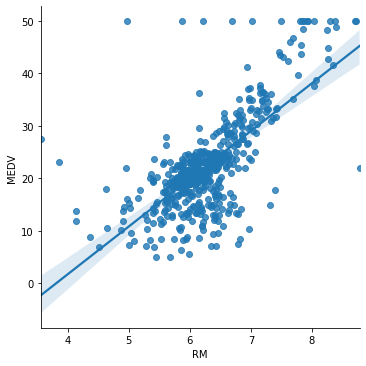

In [19]:
# seaborn라이브러리의 lmplot을 활용하여 그래프 생성
sns.lmplot(y='MEDV', x = 'RM', data = df);